### PyTorch Workflow
Machine Learning is basically just 2 steps:
* Get data into a numerical representation.
* Build a model to learn patters in that numerical represntation.

PyTorch workflow is as follows:
1. Data (Prepare and load)
2. Build Model
3. Training (Fitting the model to the data)
4. Inference (Making predictions and evaluating a model)
5. Saving and loading a model
6. Putting it all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt 

### Data
Tyoes of data:
* Excel spreadsheets
* Images
* Videos (eg YouTube clips)
* Audios (eg. songs or podcast)
* DNA
* Text

Creating *known* data using linear regression

Using a linear rigression formula to make a straight line with known **parameters**.

In [2]:
# Creating parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test samples.

In [3]:
train_split = int(0.8*len(X))
x_train, y_train =  X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

In [4]:
# Plots training data, test data, and compares predictions.
def plot_pred(train_data=x_train, train_labels= y_train, test_data= x_test, test_labels= y_test, predictions= None):
    
    plt.figure(figsize=(10,7))

    # Plotting training data
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")

    #Plotting test data
    plt.scatter(test_data, test_labels, c='g', s=4, label= "Test Data")

    # Check if any predictions have been made:
    if predictions is not None:
        # Plot predictions
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 14})

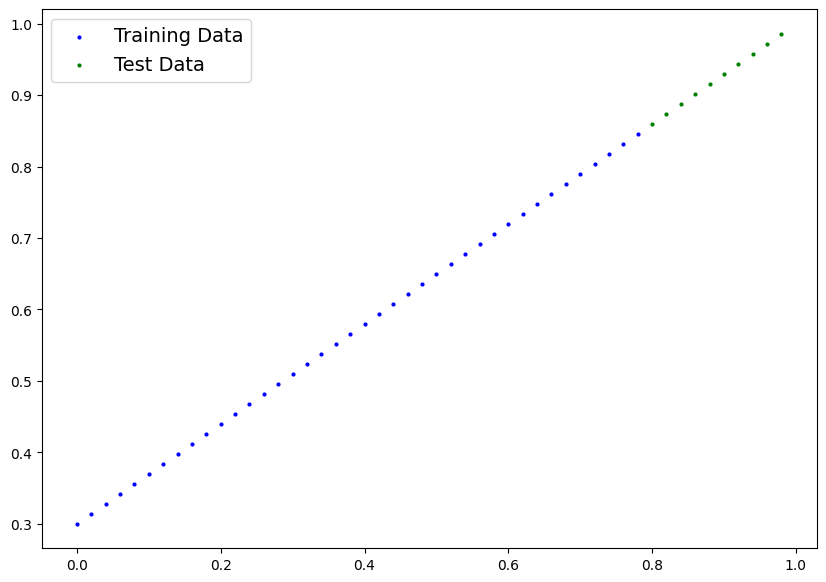

In [5]:
plot_pred()

### PyTorch Model
What the model does:
* Model starts with random values
* Look at Training data and adjust the random values to better represent the ideal values

#### How does it do that
With the help of 2 main algorithms:
* Gradient decent
* Backpropagation

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype= torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad= True, dtype= torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias # Linear Regression formula

In [7]:
## NN manuals seed nn.Parameters are random;y initialized.
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making Predictions

In [9]:
with torch.inference_mode():
    y_preds = model_0(x_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [10]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


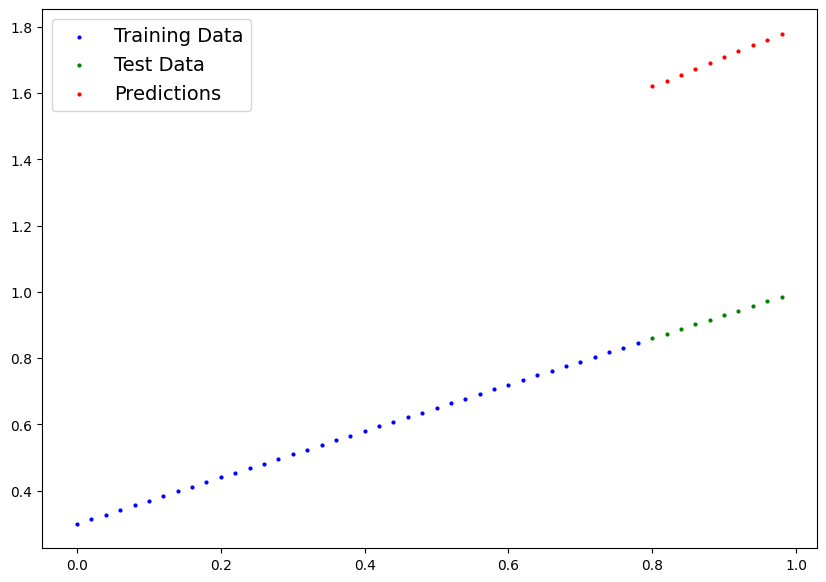

In [11]:
plot_pred(predictions=y_preds)

### Train Model
Using loss function (aka cost function or ctierion) we can check how poor the model is performing.

Things we need to train the model:
* **Loss Function:** A function to measure how wrong the model's predictions are.
* **Optimizer:** Takes into account the loss of a model and adjust the parameters to improve the loss function.

For PyTorch we need:
* A training loop
* A testing loop

In [12]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [14]:
# Setting up a loss function
loss_fn= nn.L1Loss()

# Setting up an optimizer
# Using SGD algorithm (Stochastic Gradient Decent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr -> learning rate

### Building a training loop and testing loop in PyTorch
0. Loop through the data and do...
1. Forward pass, aka forward propogation, (involves data moving through the model's `forward()` function)
2. Calculate the loss (compare the forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward- moves backward through the netwrok to calculate the gradients fo each of the parameters of the model with respect to the loss (**backpropagation**)  
5. Optimizer step- Use the parameter to adjust the model's parameters to improve loss (**gradient descent**)

In [15]:
torch.manual_seed(42)

# Epoch is 1 loop through the data
epochs =100

# Track different 
epoch_count= []
loss_values= []
test_loss_values= []
### Training
# 0. Loop through the dataa
for epoch in range(epochs):
    # Set the model in training mode.
    model_0.train() # train fucntion sets the gradients for the model

    # 1. Forward pass
    y_pred = model_0(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimize the zero grad
    optimizer.zero_grad()

    # 4. Perform backproagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ## Testing
    model_0.eval() # turns off gradient tracking
    with torch.inference_mode():
        # 1. Do forward pass
        test_pred = model_0(x_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred, y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        # Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.6860889196395874 | Test loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10 | Loss: 0.5708791017532349 | Test loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch: 20 | Loss: 0.45566922426223755 | Test loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch: 30 | Loss: 0.34045934677124023 | Test loss: 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch: 40 | Loss: 0.2252494841814041 | Test loss: 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch: 50 | Loss: 0.1100396141409874 | Test loss: 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch: 60 | Loss: 0.009724985808134079 | Test loss: 0.020998019725084305
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])

In [16]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)
y_preds_new

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

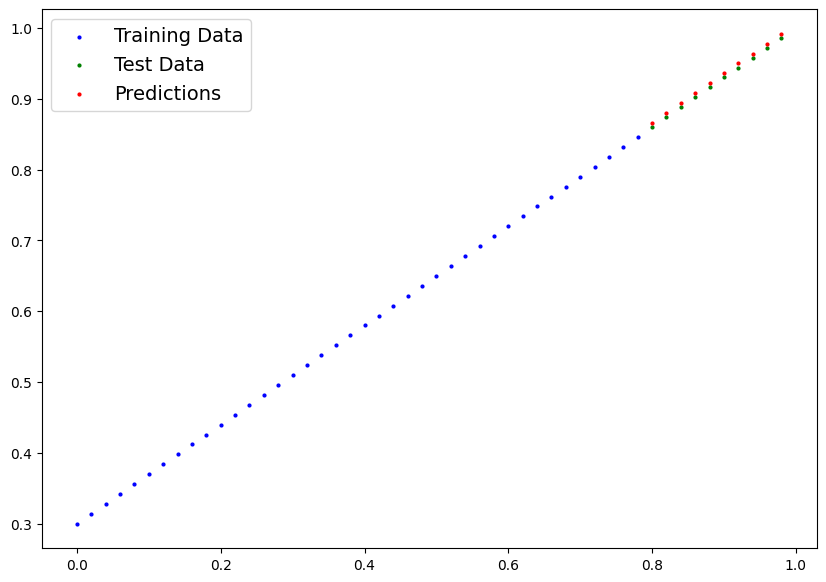

In [17]:
plot_pred(predictions=y_preds_new)

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

### Analysing the model performance
Plotting the *Training Loss Vs Time* Graph and *Testing loss Vs Time* Graph to understand how the model performed

In [19]:
import numpy as np

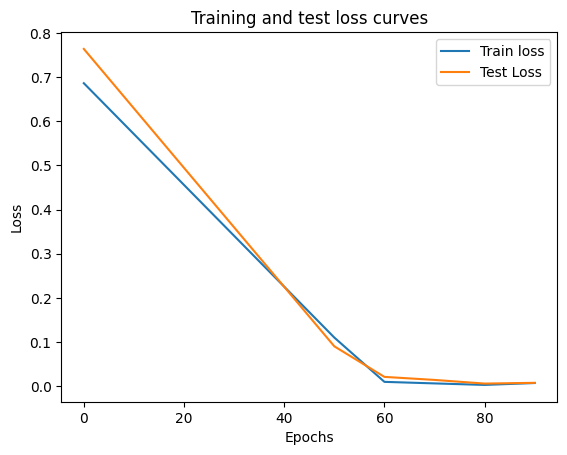

In [20]:
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

### Saving and Loading models
There are 3 main ways of saving and loading models in PyTorch
* `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
* `torch.load()` -  allows you to load a saved PyTorch model.
* `torch.nn.Module.load_state_dict()` - allows to load a model's saved state.

In [21]:
# Saving the model
from pathlib import Path

# 1. Create model directory
MODEL_PATH =Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


Since the model's `state_dict()` was saved instead of the entire model, we can create a new instance of the model class and use the saved `state_dict()` into that.

In [22]:
# Loading the model
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [24]:
# Making predictions with loaded model
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)
loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [25]:
# Make some model predictions
model_0.eval()
with torch.inference_mode():
    y_preds= model_0(x_test)
y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [26]:
# Comparing loaded model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])